#Purpose

This is a kick-starter tutorial helping you find your way building deep neural networks with Tensorflow 2.0 in Python!


---





By:

Nikita Soni 

[Stony Brook University]



---

References:

https://www.tensorflow.org/guide 

https://drive.google.com/file/d/1R1Ca8gN630u-Uclg-0iswPb6hyLAFXbS/view 

https://stackoverflow.com/ 



# Setup/Install

In [ ]:
# To install (Colab has it by default)

#pip install tensorflow

In [ ]:
# check version
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np

#Tensors, Constants, Variables

## Constants

In [ ]:
tf.constant(1)

In [ ]:
tf.constant([[1, 2, 3],
             [4, 5, 6]])

In [ ]:
np.array(1)

In [ ]:
np.array([[1, 2, 3],
          [4, 5, 6]])

In [ ]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([5, 6])
sum = tf.add(a, b)
prod = tf.multiply(a, b)

print("sum = ", sum)
print("prod = ", prod)

In [ ]:
mat_mul = tf.matmul(a, tf.transpose(b))

In [ ]:
mat_mul = tf.matmul(a, tf.reshape(b, [2,1]))

print("matrix product = ", mat_mul)

In [ ]:
tf.reshape(b, [2,1])

In TF1 all of the above operations would not have executed directly, and returns an add operation (for add) that's an operation on a data flow graph, something like:

    # Tensor("Add:0", shape=(), dtype=int32)

### To and from NumPy

In [ ]:
print("Tensor: \n ", a)
print("\n Numpy: \n ", a.numpy())

In [ ]:
ex = np.array([3,4])
tf.convert_to_tensor(ex)

## Variables

In [ ]:
## Following code snippet is from Tensorflow's site/colab

a = tf.Variable([2.0, 3.0])
# Create b based on the value of a
b = tf.Variable(a)
a.assign([5, 6])

# a and b are different
print(a.numpy())
print(b.numpy())

# There are other versions of assign
print(a.assign_add([2,3]).numpy())  # [7. 9.]
print(a.assign_sub([7,9]).numpy())  # [0. 0.]

In [ ]:
a.trainable

In [ ]:
b.trainable

In [ ]:
a = tf.Variable([2.0, 3.0], trainable=False)
a.trainable

# Computational Graph

* Image Source: Tensorflow site

![a two-layer tensorflow graph](	
https://storage.cloud.google.com/tensorflow.org/images/two-layer-network.png)

# What's with CPU and GPU?

In [ ]:
with tf.device('CPU:0'):
  a = tf.Variable([1, 2, 3])
  b = tf.Variable([4, 5, 6])
  c = a * b

print(c)

In [ ]:
tf.test.is_gpu_available()

In [ ]:
print(tf.test.gpu_device_name())

In [ ]:
with tf.device('CPU:0'):
  a = tf.Variable([1, 2, 3])
  b = tf.Variable([4, 5, 6])

with tf.device('/device:GPU:0'):
  c = a * b

print(c)

Give it a try: https://colab.research.google.com/notebooks/gpu.ipynb 

# Model Building

## Sequential model

In [ ]:
model = tf.keras.models.Sequential([
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(100, activation='relu')
])

model.layers

In [ ]:
# model.compile(optimizer= tf.keras.optimizers.Adam,
#               loss= tf.keras.losses.categorical_crossentropy,
#               metrics = tf.keras.metrics.Accuracy)


# model.fit(x_train, y_train, epochs=10)
# model.evaluate(x_test, y_test)

## Functional model

In [ ]:
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=[100, 20])
dense = layers.Dense(128, activation='relu')
output = dense(inputs)

model = tf.keras.Model(inputs, output, name="mnist_model")

model.summary()


## Subclassed model

In [ ]:
class demo_model(tf.keras.Model):
  def __init__(self, units):
    super(demo_model, self).__init__()
    self.dense = layers.Dense(units, activation='relu')

  def call(self, inputs):
    return self.dense(inputs)

In [ ]:
# demo_model_instance = demo_model(units=128)
# x = tf.constant([[3,3],
#                 [4,5]])
# demo_model_instance(x)

# Logistic Regression

## Dataset 

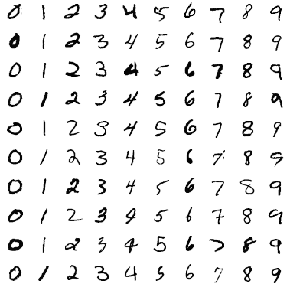

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

## Normalization and Flattening

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
num_features = 28*28  #784
num_classes = 10

In [ ]:
x_train = x_train.reshape([-1, num_features])
x_test = x_test.reshape([-1, num_features])

## Define model hyper-parameters

In [ ]:
lr = 0.01
batch_size = 128
epochs = 25
batches_count = int(len(x_train)/batch_size)

## Batch Dataset (with shuffle)

In [ ]:
tr_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [ ]:
tr_data = tr_data.shuffle(len(x_train))

In [ ]:
tr_data = tr_data.batch(batch_size=batch_size)

## Define model parameters/varaibles

In [ ]:
x_train.dtype

dtype('float32')

In [ ]:
def initializeModelParams():
  W = tf.Variable(tf.random.normal([num_features, num_classes], dtype=tf.float32))
  b = tf.Variable(tf.random.normal([num_classes,], dtype=tf.float32))
  return W, b

## Defining the model

In [ ]:
def logistic_regression(X, W, b):
  logits = tf.matmul(X, W) + b
  return logits

## Define the loss

In [ ]:
def cross_entropy(pred_label, true_label):
  true_label = tf.one_hot(true_label, num_classes)
  loss = -tf.reduce_mean((true_label * tf.math.log(pred_label+ (1e-7))))
  return loss

In [ ]:
## Aside
# ce = tf.nn.softmax_cross_entropy_with_logits(labels=true_labels, logits=pred_labels)
# ce_loss = tf.reduce_mean(ce)

## Define Optimizer

In [ ]:
optimizer = tf.optimizers.Adam(learning_rate=lr)

## Define accuracy metric

In [ ]:
def calculate_accuracy(pred_labels, true_labels):
    correct_predictions = tf.equal(tf.argmax(pred_labels, axis=1), tf.cast(true_labels, tf.int64))
    return tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

## Training loop

In [ ]:
def train(tr_dataset):
  weights, bias = initializeModelParams()
  for epoch in range(epochs):
    print(epoch)
    total_loss = 0
    
    for batch, (X, Y) in enumerate(tr_dataset.take(batches_count), 1):
      with tf.GradientTape() as grad:
        logits = logistic_regression(X, weights, bias)
        pred_labels = tf.nn.softmax(logits=logits)
        loss = cross_entropy(pred_labels, Y)
      grads = grad.gradient(loss, [weights, bias])
      optimizer.apply_gradients(zip(grads, [weights, bias]))
      total_loss += loss
      accuracy = calculate_accuracy(pred_labels, Y)

    print("epoch: ", epoch)
    print("loss: ", total_loss)
    print("acc: ", accuracy)
    
  return weights, bias

In [ ]:
tuned_weights, tuned_bias = train(tr_data)

0
epoch:  0
loss:  tf.Tensor(61.611023, shape=(), dtype=float32)
acc:  tf.Tensor(0.9140625, shape=(), dtype=float32)
1
epoch:  1
loss:  tf.Tensor(23.885195, shape=(), dtype=float32)
acc:  tf.Tensor(0.921875, shape=(), dtype=float32)
2
epoch:  2
loss:  tf.Tensor(19.737759, shape=(), dtype=float32)
acc:  tf.Tensor(0.8984375, shape=(), dtype=float32)
3
epoch:  3
loss:  tf.Tensor(17.432928, shape=(), dtype=float32)
acc:  tf.Tensor(0.9296875, shape=(), dtype=float32)
4
epoch:  4
loss:  tf.Tensor(16.165466, shape=(), dtype=float32)
acc:  tf.Tensor(0.90625, shape=(), dtype=float32)
5
epoch:  5
loss:  tf.Tensor(15.446478, shape=(), dtype=float32)
acc:  tf.Tensor(0.90625, shape=(), dtype=float32)
6
epoch:  6
loss:  tf.Tensor(14.686227, shape=(), dtype=float32)
acc:  tf.Tensor(0.9140625, shape=(), dtype=float32)
7
epoch:  7
loss:  tf.Tensor(14.280325, shape=(), dtype=float32)
acc:  tf.Tensor(0.953125, shape=(), dtype=float32)
8
epoch:  8
loss:  tf.Tensor(14.022488, shape=(), dtype=float32)
acc: 

## Test the model

In [ ]:
test_pred_labels = logistic_regression(x_test, tuned_weights, tuned_bias)
test_accuracy = calculate_accuracy(test_pred_labels, y_test)

print("Test Accuracy: ", test_accuracy.numpy()*100)

Test Accuracy:  91.51999950408936
